In [32]:
import parse_data.prepare_data as prepare_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import globals
import os
from scipy.stats import pearsonr


In [33]:
# paths
# data_folder = '/home/tom/Documents/SWC/data' # desktop Duan Lab
data_folder = r'D:\Users\Tom\OneDrive\PhD\SWC\data' # desktop home
# data_folder = r'C:\Users\tomha\OneDrive\PhD\SWC\data' # octagon laptop
# json_filename = '240913_Yansu_Jerry/2024-09-13_11-53-34_YansuSecondSolo.json' 
# json_filename = '240913_Yansu_Jerry/2024-09-13_11-31-00_YansuJerrySocial.json'
json_filenames = [r'fourth_experiments_2410\241017\2024-10-17_16-41-38_ZimoElsaSocial.json']
# all socials
json_filenames_all = [r'first_experiments_2409\240913\2024-09-13_11-31-00_YansuJerrySocial.json',
               r'second_experiments_2409\240927\2024-09-27_14-25-20_SaraEmilySocial.json',
               r'third_experiments_2410\241017\2024-10-17_14-28-40_ShamirAbigailSocial.json',
               r'fourth_experiments_2410\241017\2024-10-17_16-41-38_ZimoElsaSocial.json']

In [34]:
df, trials_list = prepare_data.prepare_data(data_folder, json_filenames)

filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\fourth_experiments_2410\241017\2024-10-17_16-41-38_ZimoElsaSocial.json
Loading complete.
Preprocessing complete.


In [35]:
final_trial = trials_list[-1]
final_trial_trial_end = final_trial[final_trial['eventDescription'] == 'trial end']

player0_score = final_trial_trial_end[globals.PLAYER_SCORE_DICT[0]['score']]
player1_score = final_trial_trial_end[globals.PLAYER_SCORE_DICT[1]['score']]
total_score = player0_score + player1_score

proportion_score_player0 = player0_score/total_score
proportion_score_player1 = player1_score/total_score

In [36]:
player0_score.item()

2390.0

In [37]:
proportion_score_player0, proportion_score_player1

(84258    0.335674157
 dtype: float64,
 84258    0.664325843
 dtype: float64)

In [38]:
# go through every session and find the proportion of score in the session that players achieved

proportion_scores_all_sessions = np.zeros((len(json_filenames_all), 2))
for json_filenames_index in range(len(json_filenames_all)):
    json_filenames = json_filenames_all[json_filenames_index]
    print(data_folder + os.sep + json_filenames)
    df, trials_list = prepare_data.prepare_data(data_folder, [json_filenames])

    final_trial = trials_list[-1]
    final_trial_trial_end = final_trial[final_trial['eventDescription'] == 'trial end']
    
    player0_score = final_trial_trial_end[globals.PLAYER_SCORE_DICT[0]['score']].item()
    player1_score = final_trial_trial_end[globals.PLAYER_SCORE_DICT[1]['score']].item()
    total_score = player0_score + player1_score
    
    proportion_score_player0 = player0_score/total_score
    proportion_score_player1 = player1_score/total_score

    proportion_scores_all_sessions[json_filenames_index, 0] = proportion_score_player0
    proportion_scores_all_sessions[json_filenames_index, 1] = proportion_score_player1

D:\Users\Tom\OneDrive\PhD\SWC\data\first_experiments_2409\240913\2024-09-13_11-31-00_YansuJerrySocial.json
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\first_experiments_2409\240913\2024-09-13_11-31-00_YansuJerrySocial.json
Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
Preprocessing complete.
D:\Users\Tom\OneDrive\PhD\SWC\data\second_experiments_2409\240927\2024-09-27_14-25-20_SaraEmilySocial.json
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\second_experiments_2409\240927\2024-09-27_14-25-20_SaraEmilySocial.json
Loading complete.
Preprocessing complete.
D:\Users\Tom\OneDrive\PhD\SWC\data\third_experiments_2410\241017\2024-10-17_14-28-40_ShamirAbigailSocial.json
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\third_experiments_2410\241017\2024-10-17_14-28-40_ShamirAbigailSocial.json
Loading complete.
Preprocessing complete.
D:\Users\Tom\OneDrive\PhD\SWC\data\fourth_experiments_2410\241017\2024-10-17_16-41-38

In [39]:
proportion_scores_all_sessions

array([[0.42406312, 0.57593688],
       [0.37438424, 0.62561576],
       [0.42009132, 0.57990868],
       [0.33567416, 0.66432584]])

In [40]:
# # REALISED I WAS INCLUDING FORCED TRIALS HERE
# probability_first_wall_chosen_when_low_array = np.array([[0.75      , 0.73913043],
#        [0.86363636, 0.53846154],
#        [0.46428571, 0.82051282],
#        [0.70689655, 0.671875  ]])

In [41]:
probability_first_wall_chosen_when_low_array = np.array([[0.6969697 , 0.7027027 ],
       [0.83333333, 0.5       ],
       [0.43478261, 0.79411765],
       [0.67391304, 0.625     ]])

In [42]:
probability_first_wall_chosen_when_low_array.ravel()

array([0.6969697 , 0.7027027 , 0.83333333, 0.5       , 0.43478261,
       0.79411765, 0.67391304, 0.625     ])

In [43]:
proportion_scores_all_sessions.ravel()

array([0.42406312, 0.57593688, 0.37438424, 0.62561576, 0.42009132,
       0.57990868, 0.33567416, 0.66432584])

Text(0, 0.5, 'Performance')

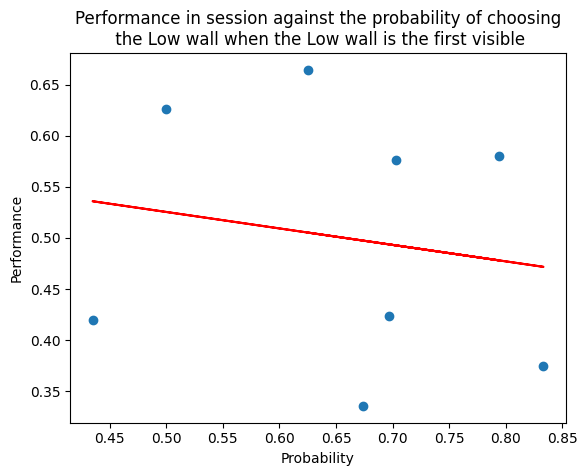

In [44]:
# plot the graph and the correlation

x = probability_first_wall_chosen_when_low_array.ravel()
y = proportion_scores_all_sessions.ravel()

plt.scatter(x, y)

# Fit a line to the data
slope, intercept = np.polyfit(x, y, 1)  # 1st-degree polynomial (linear fit)
line = slope * x + intercept

# Plot the correlation line
plt.plot(x, line, color='red', label=f'Fit line: y = {slope:.2f}x + {intercept:.2f}')

plt.title("Performance in session against the probability of choosing\n the Low wall when the Low wall is the first visible")
plt.xlabel("Probability")
plt.ylabel("Performance")

In [45]:
correlation_matrix = np.corrcoef(x, y)
correlation_value = correlation_matrix[0, 1]
correlation_value

np.float64(-0.1744377653809014)

In [46]:
# Calculate correlation using scipy (returns correlation value and p-value)
correlation, p_value = pearsonr(x, y)
correlation, p_value

(np.float64(-0.17443776538090144), np.float64(0.6795034800622577))

In [47]:
# take ratios of player1/player2 in each session

ratio_probability_first_wall_chosen_when_low = probability_first_wall_chosen_when_low_array[:,0]/probability_first_wall_chosen_when_low_array[:,1]
ratio_proportion_scores_all_sessions = proportion_scores_all_sessions[:,0]/proportion_scores_all_sessions[:,1]
proportion_scores_all_sessions_player_1 = proportion_scores_all_sessions[:,0]

In [48]:
ratio_probability_first_wall_chosen_when_low, ratio_proportion_scores_all_sessions, proportion_scores_all_sessions_player_1

(array([0.9918415 , 1.66666666, 0.54750403, 1.07826086]),
 array([0.73630137, 0.5984252 , 0.72440945, 0.50528541]),
 array([0.42406312, 0.37438424, 0.42009132, 0.33567416]))

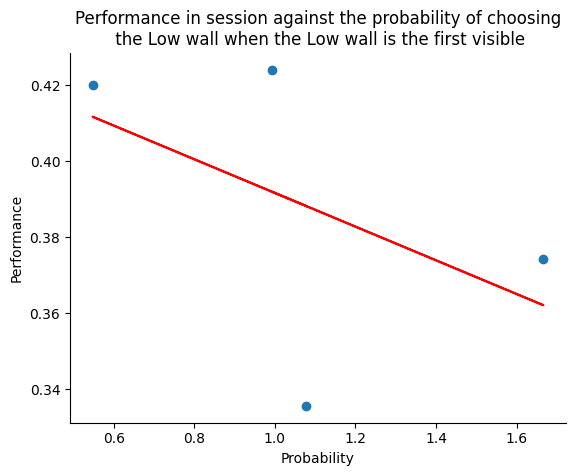

In [54]:
# plot the graph and the correlation

x = ratio_probability_first_wall_chosen_when_low.ravel()
y = proportion_scores_all_sessions_player_1.ravel()

plt.scatter(x, y)

# Fit a line to the data
slope, intercept = np.polyfit(x, y, 1)  # 1st-degree polynomial (linear fit)
line = slope * x + intercept

# Plot the correlation line
plt.plot(x, line, color='red', label=f'Fit line: y = {slope:.2f}x + {intercept:.2f}')

plt.title("Performance in session against the probability of choosing\n the Low wall when the Low wall is the first visible")
plt.xlabel("Probability")
plt.ylabel("Performance")

# Remove top and bottom spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [50]:
correlation_matrix = np.corrcoef(x, y)
correlation_value = correlation_matrix[0, 1]
correlation_value

np.float64(-0.48726383789859296)

In [51]:
# Calculate correlation using scipy (returns correlation value and p-value)
correlation, p_value = pearsonr(x, y)
correlation, p_value

(np.float64(-0.4872638378985928), np.float64(0.5127361621014073))